# Pandas（パンダス）とは

Pandasは、Pythonのデータ分析用のライブラリです。
Excelやcsvファイルの読み書き、データ集計・分析・加工、グラフ化などができます。


# オープンデータ

オープンデータとは、公共機関が調査した誰でも使える公表データです。

厚生省・新型コロナウイルス感染症について

https://www.mhlw.go.jp/stf/covid-19/open-data.html

新規陽性者数の推移（日別）オープンデータ（CSV形式）

https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv

In [ ]:
import pandas as pd
import numpy as np

# csvを読み込み、Dateを日付形式にする
df = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv', parse_dates=["Date"])
# Date が 2022/3/10より大きいものだけ抜き出し、ALL 列は削除する
df = df[df["Date"] > np.datetime64("2022-01-01")]
# Date をインデックスにする
df.set_index(["Date"],inplace=True)
df

統計量をみてみる

In [ ]:
# 要約統計量を見る（各列ごとの平均、標準偏差、最大値、最小値、最頻値など）
df.describe()

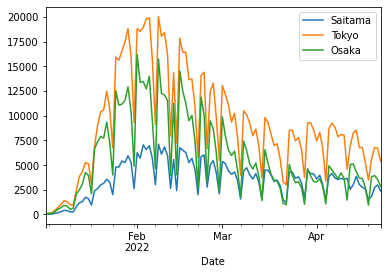

In [ ]:
df2 = df[['Saitama','Tokyo','Osaka']] #埼玉、東京、千葉だけ取り出す
df2.plot()

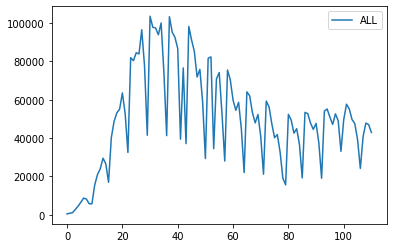

In [26]:
# ALL だけを取り出してグラフにする
df2 = df[['ALL']]   
df2.plot()

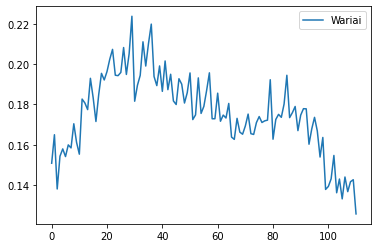

In [27]:
# Tokyo が ALL に占める割合を計算してグラフにする
df['Wariai'] = df['Tokyo'] / df['ALL']
df2 = df[['Wariai']]
df2.plot()

# ドライブのマウントとExcelファイル

In [ ]:
# ドライブをマウント（使えるようにする）
from google.colab import drive
drive.mount('/content/drive')

In [28]:
# Excelファイルを書き出す
df.to_excel('/content/drive/MyDrive/pythonテスト.xlsx', index=False)


In [ ]:
# Excelファイルを読み込む
df = pd.read_excel('/content/drive/MyDrive/pythonテスト.xlsx')
df